# 因子分析１

ここでは因子分析を行い、都道府県ごとの因子得点を算出します。因子数は２で、「本人の行動」、「周囲の環境」を軸として捉えます。
これは、もともとアンケート項目を整理すると、主にこの二つのタイプがあったことから、この２軸を設定しました。（これについては、04-1因子分析準備のファイルも参考にしてください）

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#matplotlibをjupyter上で使えるようにする
%matplotlib inline

In [3]:
df = pd.read_csv("04-1output_因子分析データセット.csv",  encoding="utf-8")
df = df.drop("Unnamed: 0", axis=1)
df

,85悪口等のメール・メッセージ送った,85掲示板で自分や他人の情報書き込んだ,85親に話しにくいサイトを見た,85ゲームなどでお金を使いすぎた,85差別内容掲載サイトにアクセスする,85ネットで知り合った人とメール等した,85ネットで知り合った異性と会った,86利用する時間を決めている,86メール・メッセージを送る相手の制限,86送信・投稿内容を決めている,86料金上限や課金方法を決めている,87親（保護者）から教えてもらった,87兄弟・姉妹から教えてもらった,87機器の購入時に販売員より説明された
0,1.5,2.2,0.0,1.5,0.7,8.8,0.7,32.1,5.1,14.6,28.5,45.0,3.3,4.6
1,0.0,5.6,5.6,5.6,5.6,22.2,0.0,16.7,16.7,5.6,27.8,38.5,3.8,7.7
2,0.0,0.0,2.4,0.0,0.0,0.0,0.0,33.3,11.9,2.4,2.4,32.7,0.0,2.0
3,0.0,0.0,0.0,1.8,0.0,1.8,0.0,39.3,7.1,8.9,21.4,38.7,2.7,6.7
4,0.0,5.0,0.0,5.0,0.0,15.0,0.0,45.0,10.0,10.0,20.0,64.3,3.6,7.1
5,2.2,2.2,2.2,2.2,0.0,8.7,0.0,26.1,10.9,8.7,17.4,35.4,4.2,6.3
6,0.0,3.6,0.0,3.6,0.0,32.1,0.0,25.0,14.3,7.1,32.1,31.0,4.8,4.8
7,1.3,2.5,2.5,2.5,0.0,11.3,0.0,36.3,10.0,21.3,32.5,43.8,5.6,4.5
8,1.8,1.8,1.8,3.5,1.8,14.0,0.0,28.1,14.0,7.0,28.1,37.8,1.4,9.5
9,0.0,6.8,6.8,2.3,4.5,18.2,2.3,31.8,15.9,22.7,25.0,40.0,5.5,10.9


In [4]:
#factor_analyzerを使う
from factor_analyzer import FactorAnalyzer
df.index = df.index
df.columns = df.columns


In [5]:
# 因子数は2で設定する
fa = FactorAnalyzer()
fa = FactorAnalyzer(n_factors=2,rotation='varimax')#バリマックスか、回転しないならNone
fa.fit(df)


FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

[[ 0.55667583  0.04309801]
 [ 0.21644627  0.00787539]
 [ 0.32579859  0.08210903]
 [ 0.46651593  0.13655796]
 [ 0.56785311  0.03484808]
 [ 0.6955657   0.21201258]
 [ 0.48021692 -0.20401125]
 [-0.37852077  0.16798986]
 [ 0.02675486  0.51369551]
 [ 0.08160978  0.35705791]
 [ 0.18414023  0.67235101]
 [-0.01066672  0.56318513]
 [-0.12150279  0.39922245]
 [ 0.03171342  0.39836011]]
[0.5566758309579621, 0.216446267250689, 0.3257985925413382, 0.46651592628312516, 0.5678531129696537, 0.6955657036543518, 0.4802169189791199, -0.37852076711442145, 0.02675485895889449, 0.08160978486164469, 0.18414022690163365, -0.010666715287237121, -0.12150279020951446, 0.03171342180256965]
[0.0430980106348234, 0.007875390594011107, 0.08210902671527812, 0.13655795549942137, 0.03484807600315628, 0.21201257506812918, -0.20401125406665363, 0.16798986039612931, 0.5136955092723774, 0.35705790646486074, 0.672351008731593, 0.563185129046316, 0.3992224459361101, 0.39836010972863733]


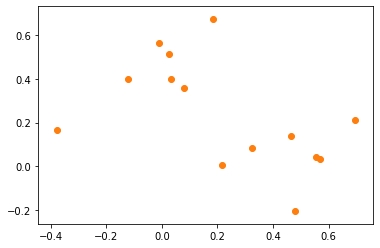

In [6]:
# 因子負荷量を出力
list_load = fa.loadings_
print(list_load)

x = list(list_load[:, 0])
y = list(list_load[:, 1])
print(x)
print(y)

plt.scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None, 
            vmin=None, vmax=None, alpha=None, linewidths=None, 
            verts=None, edgecolors=None, data=None)

 
# 散布図を描画
plt.scatter(x, y)

↑14の項目はおおむねいい感じに分かれているようです（というか、うまく分かれない項目は既に取り除いています）

In [8]:
df_loadings = pd.DataFrame(list_load)
df_loadings.to_csv("04-2output_因子負荷量.csv")

In [9]:
#寄与度、寄与率、累積寄与率の出力
fa.get_factor_variance()

(array([1.91783992, 1.62199046]),
 array([0.13698857, 0.11585646]),
 array([0.13698857, 0.25284503]))

In [10]:
#  固有値を出力
fa.get_eigenvalues()

(array([2.72162717, 2.20456089, 1.22606882, 1.04971883, 1.00594467,
        0.93576902, 0.82163978, 0.78844327, 0.75798288, 0.62169883,
        0.53100208, 0.47720125, 0.46688559, 0.39145694]),
 array([ 2.05753515,  1.48229643,  0.46221812,  0.2489815 ,  0.21386434,
         0.09316665,  0.05219291,  0.02418787, -0.02995705, -0.1029506 ,
        -0.11682036, -0.21114175, -0.29791133, -0.33583149]))

In [11]:
#因子得点
list_transform=fa.transform(df)
list_transform

array([[-2.26530029e-01,  4.43243388e-01],
       [ 1.63226270e+00,  7.76229152e-01],
       [-1.06866568e+00, -1.14452461e+00],
       [-1.02918894e+00,  9.43705302e-02],
       [-2.65170490e-01,  1.00233175e+00],
       [-1.74656136e-01,  2.57605378e-02],
       [ 8.62325122e-01,  8.64717875e-01],
       [-2.24243812e-01,  1.16037084e+00],
       [ 4.15327810e-01,  6.80678165e-01],
       [ 1.20222403e+00,  1.08859254e+00],
       [-1.16600168e-01, -3.69019087e-01],
       [-8.74420335e-02,  2.13636792e-03],
       [-8.18038649e-02,  7.99480399e-01],
       [-6.07918357e-02,  4.35318927e-01],
       [ 6.80142276e-01, -3.47762651e-01],
       [-6.03435334e-01, -1.06712662e+00],
       [-7.72224496e-01,  2.75220596e+00],
       [-1.04539935e+00, -2.48586048e-01],
       [-2.95631325e-02,  1.11978842e+00],
       [ 1.41227297e+00,  1.05628464e+00],
       [-2.60397592e-01,  1.28505192e+00],
       [-3.00384281e-01,  1.12696721e+00],
       [-1.87878610e-01, -1.44230590e-01],
       [-4.

In [12]:
df_transform = pd.DataFrame(list_transform)
df_transform.to_csv("04-2output_因子得点.csv")


↑全レコードの因子得点です。各レコードは都道府県なのですが、４カ年分結合しているので、平均をとると、都道府県ごとの平均因子得点になります。（レポートのPPTファイルでは、平均をとっています）